* [ESP: analytical method (the wrong one)](#ESP%3A-analytical-method-%28the-wrong-one%29)
* [ESP: iterative method (the right one)](#ESP%3A-iterative-method-%28the-right-one%29)
* [ESP: analytical method (the RIGHT one)](#ESP%3A-analytical-method-%28the-RIGHT-one%29)
* [ESP: analytical method (the RIGHT one) 1.01](#ESP%3A-analytical-method-%28the-RIGHT-one%29-1.01)

In [72]:
%matplotlib inline
from pylab import *

# costants
#-------------------------------------------------------
n = 200
dt = 0.001
tau = 0.01
epsilon = 1e-23
alpha = 0.3
target = 1-epsilon
itarget = 1.0 - (epsilon/2.0)
#-------------------------------------------------------


# utils
#-------------------------------------------------------
def get_rho_and_eig(X) :
    e = eigvals(X) 
    return  max(abs(e)), e

def get_W_from_M(X) :
    return (tau/dt)*(X - (1-(dt/tau))*eye(n,n)) 

def get_M_from_W(X) :
    return (dt/tau)*X + (1-(dt/tau))*eye(n,n)

def modulate_rotation_contraction(X) :
    W1 = .5*(X-X.T)
    W2 = .5*(X+W.T)

    return alpha*W2 +(1-alpha)*W1

#-------------------------------------------------------
00
# create initial weights
W = randn(n, n)
W = modulate_rotation_contraction(W)
rho, e = get_rho_and_eig(W) 
3
SSW = W.copy()
# store weights scaled tho rho=1
SW = (W/rho)
00
print "done"

done


### ESP: analytical method (the wrong one)


ESP: analytical method (the wrong one)"

W
--------------------------------------
rho :=  13.546629074335  
min :=  -9.5611  max :=   1.7576   

M_tilde 
--------------------------------------
rho :=   1.000000000000  
min :=  -0.1662  max :=   0.1758   



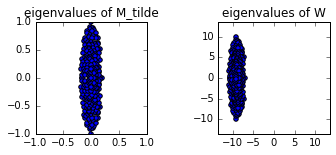

In [73]:
M = SW*target
W = get_W_from_M(M)

figure("Method1", figsize=(6,2))
#*****************************
m_rho, m_e = get_rho_and_eig(M) 
#*****************************
subplot(121, aspect="equal")
title("eigenvalues of M_tilde")
scatter(real(m_e), imag(m_e))
xlim([-m_rho, m_rho])
ylim([-m_rho, m_rho])
#*****************************

#*****************************
rho, e = get_rho_and_eig(W) 
#*****************************
subplot(122, aspect="equal")
title("eigenvalues of W")
scatter(real(e), imag(e))
xlim([-rho, rho])
ylim([-rho, rho])
#*****************************

print """
ESP: analytical method (the wrong one)"

W
--------------------------------------
rho := {:16.12f}  
min := {:8.4f}  max := {:8.4f}   

M_tilde 
--------------------------------------
rho := {:16.12f}  
min := {:8.4f}  max := {:8.4f}   
""".format(rho, W.min(), W.max(), 
           m_rho, M.min(), M.max())

### ESP: iterative method (the right one)


ESP: iterative method
W
--------------------------------------
rho :=   4.330463513914  
min :=  -0.7199  max :=   0.7611   

M_tilde 
--------------------------------------
rho :=   1.000000000000  
min :=  -0.0720  max :=   0.9297   



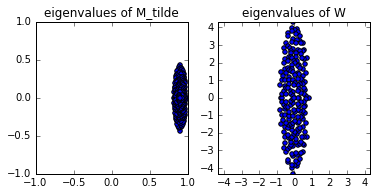

In [74]:
from scipy.optimize import bisect

def dist(rho_estimate) :
    M = get_M_from_W(rho_estimate*SW)
    effective_rho_estimate,_ = get_rho_and_eig(M)
    return itarget - effective_rho_estimate

rho_estimate = bisect( lambda x: dist(x), 1-epsilon, tau/dt, xtol = epsilon/2. )

W = SW*rho_estimate
M = get_M_from_W(W)

figure("Method2")
#*****************************
m_rho, m_e = get_rho_and_eig(M) 
#*****************************
subplot(121, aspect="equal")
title("eigenvalues of M_tilde")
scatter(real(m_e), imag(m_e))
xlim([-m_rho, m_rho])
ylim([-m_rho, m_rho])
#*****************************

#*****************************
rho, e = get_rho_and_eig(W) 
#*****************************
subplot(122, aspect="equal")
title("eigenvalues of W")
scatter(real(e), imag(e))
xlim([-rho, rho])
ylim([-rho, rho])
#*****************************

print """
ESP: iterative method
W
--------------------------------------
rho := {:16.12f}  
min := {:8.4f}  max := {:8.4f}   

M_tilde 
--------------------------------------
rho := {:16.12f}  
min := {:8.4f}  max := {:8.4f}   
""".format(rho, W.min(), W.max(), 
           m_rho, M.min(), M.max())

### ESP: analytical method (the RIGHT one)

In [75]:
target = 1 - epsilon/2.

W = SW.copy()

#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§

rho, e = get_rho_and_eig(W) 

x = e.real
y = e.imag
h = dt/tau

#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§


$$ 
\begin{align}
&&&\max\left|\mathbf{\Lambda}_W\right| = k \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
h = \frac{\delta t}{\tau} \\
&\left|\mathbf{\Lambda}_M\right| = \sqrt{ \left(hk\mathbf{x} + \left(1-h\right)\right)^2 + \left(hk\mathbf{y}\right)^2 }& 
\end{align}
$$

Nota: l'equazione alla destra rappresenta non direttamente il raggio 
spettrale ma come varia in funzione di k la grandezza di ogni
autovalore. La grandezza di un autovalore non è altro che la
lunghezza del suo vettore quando è rappresentato nello spazio
dei numeri complessi.

$$
\begin{align}
&&t = 1 - \frac{\epsilon}{2} \ \ \ \ \ \ \ \
\mathbf{t} = t\cdot\mathbf{1}_n \\
\\
&\left|\mathbf{\Lambda}_M\right| - \mathbf{t} &= 0 \\
&(\mathbf{x}^2h^2+\mathbf{y}^2h^2)k^2 + (2\mathbf{x}h-2\mathbf{x}h^2)k + (1+h^2-2h-\mathbf{t}^2) &= 0
\end{align}
$$

Nota: risolviamo l'equazione qui sopra per ogni autovalore in modo da scoprire
con quale valore di K possiamo farlo diventare grande esattamente target.

In [76]:
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§

a = x**2*h**2+y**2*h**2
b = 2*x*h-2*x*h**2
c = 1+h**2-2*h-target**2
#discr = b**2-4*a*c #discriminante, per verificare l'esistenza di soluzioni
sol1 = (-b - sqrt(b**2-4*a*c))/(2*a)
sol2 = (-b + sqrt(b**2-4*a*c))/(2*a)
#print sol1, sol2

#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§

*Sol1* e *Sol2* ci indicano per 
quali valori di K i vari 
autovalori assumono 
grandezza uguale a target.
Adesso dobbiamo trovare un 
valore di K tale che uno degli 
autovalori è uguale a target 
mentre gli altri sono tutti
minori di target.
In questo modo, siamo sicuri che
il raggio spettrale sarà uguale
a target in quanto l'autovalore 
più grande sarà uguale a target.
Sappiamo che gli autovalori 
(o meglio il loro quadrato)
crescono come delle parabole. 
Inoltre, il coefficiente a della 
parabola è sempre positivo.
Quindi sappiamo che la parabola 
ha i rami verso l'altro, il che 
implica che tra le due soluzioni,
la parabola è minore di target 
mentre all'esterno è maggiore.
Facendo un intersezione degli 
intervalli compresi tra le due 
soluzioni di tutti gli autovalori,
troviamo un intervallo in cui 
*tutti* gli autovalori sono
minori di target.
Scegliendo poi l'estremo destro 
di questo intervallo, ci troviamo 
in un punto in cui tutti sono
minori di target tranne coloro 
che hanno una soluzione in quel
punto e sono quindi pari a target.
Il raggio spettrale in quel
punto è quindi target.


ESP: analytical method (the RIGHT one)
W
--------------------------------------
rho :=   4.330463513914  
min :=  -0.7199  max :=   0.7611   

M_tilde 
--------------------------------------
rho :=   1.000000000000  
min :=  -0.0720  max :=   0.9297   



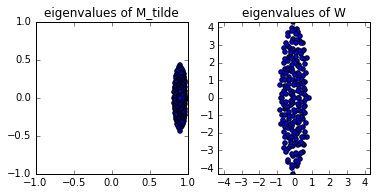

In [77]:
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
def overlap(sol1,sol2):
    interval = (sol1[0], sol2[0])
    for left, right in zip(sol1,sol2):
        if right < left:
            print 'Ouch! Found right solution smaller than left solution..'
        minimum = max(left, interval[0])
        maximum = min(right, interval[1])
        if minimum > maximum:
            print 'No interval..'
            break
        interval = (minimum,maximum)
    return interval
    
#we choose the solution on the right (the left one can 
#be negative (or maybe always is))
correctRhoMultiplier = overlap(sol1,sol2)[1] 
W = correctRhoMultiplier*W

#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§

M = get_M_from_W(W)

figure("Method3")
#*****************************
m_rho, m_e = get_rho_and_eig(M)
#*****************************
subplot(121, aspect="equal")
title("eigenvalues of M_tilde")
scatter(real(m_e), imag(m_e))
xlim([-m_rho, m_rho])
ylim([-m_rho, m_rho])
#*****************************

#*****************************
rho, e = get_rho_and_eig(W)
#*****************************
subplot(122, aspect="equal")
title("eigenvalues of W")
scatter(real(e), imag(e))
xlim([-rho, rho])
ylim([-rho, rho])
#*****************************
print """
ESP: analytical method (the RIGHT one)
W
--------------------------------------
rho := {:16.12f}  
min := {:8.4f}  max := {:8.4f}   

M_tilde 
--------------------------------------
rho := {:16.12f}  
min := {:8.4f}  max := {:8.4f}   
""".format(rho, W.min(), W.max(), 
           m_rho, M.min(), M.max())


### ESP: analytical method (the RIGHT one) 1.01
Maibe we can skip the search through the eigenvalues


ESP: analytical method (the RIGHT one)
W
--------------------------------------
rho :=   4.330463513914  
min :=  -0.7199  max :=   0.7611   

M_tilde 
--------------------------------
rho :=   1.000000000000  
min :=  -0.0720  max :=   0.9297   



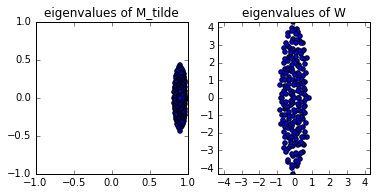

In [78]:
target = 1 - epsilon/2.

W = SW.copy()
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§

rho, e = get_rho_and_eig(W) 
x = e.real
y = e.imag
h = dt/tau
a = x**2*h**2 + y**2*h**2
b = 2*x*h - 2*x*h**2
c = 1 + h**2 - 2*h - target**2

# just get the positive solutions
sol2 = (-b + sqrt(b**2 - 4*a*c))/(2*a)
# and take the minor amongst them
correctRhoMultiplier = min(sol2)
W = correctRhoMultiplier*W

#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§
#§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§§

M = get_M_from_W(W)

figure("Method3")
#*****************************
m_rho, m_e = get_rho_and_eig(M)
#*****************************
subplot(121, aspect="equal")
title("eigenvalues of M_tilde")
scatter(real(m_e), imag(m_e))
xlim([-m_rho, m_rho])
ylim([-m_rho, m_rho])
#*****************************

#*****************************
rho, e = get_rho_and_eig(W)
#*****************************
subplot(122, aspect="equal")
title("eigenvalues of W")
scatter(real(e), imag(e))
xlim([-rho, rho])
ylim([-rho, rho])
#*****************************
print """
ESP: analytical method (the RIGHT one)
W
--------------------------------------
rho := {:16.12f}  
min := {:8.4f}  max := {:8.4f}   

M_tilde 
--------------------------------
rho := {:16.12f}  
min := {:8.4f}  max := {:8.4f}   
""".format(rho, W.min(), W.max(), 
           m_rho, M.min(), M.max())
